## Preprocessing

In [8]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
import shap
import matplotlib.pyplot as plt
import tqdm
from timeit import default_timer as timer

from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_validate

In [9]:
os.chdir('c:/users/fre_f/pythonprojects/bacteriological/')

In [10]:
df = pd.read_csv('./data/final/05_species_desl_ra.csv')

In [11]:
df.head()

,Index,DESL,None;Other;Other;Other;Other;Other;Other,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;s__smithii,k__Bacteria;p__Acidobacteria;c__Acidobacteria;o__NA;f__NA;g__Blastocatella;s__sp3006,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp3737,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp4001,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Acidimicrobiaceae;g__NA;s__sp4262,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4310,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4312,...,Light treatment,OSDI score,DEQ5 score,TBUT OD,TBUT OS,OSS OD,OSS OS,ST OD,ST OS,Demodicosis
0,P1,3,0.000000,0.000000,0.0,0.0,0,0,0.0,0,...,0,NaN,NaN,3,3,0,0,23,23,0
1,P2,3,0.000000,0.000000,0.0,0.0,0,0,0.0,0,...,0,31.25,17.0,2,4,1,3,14,18,0
2,P3,2,0.000233,0.007146,0.0,0.0,0,0,0.0,0,...,1,33.30,16.0,8,8,3,3,11,8,0
3,P4,3,0.000000,0.000000,0.0,0.0,0,0,0.0,0,...,0,93.75,21.0,3,2,2,2,12,11,0
4,P5,1,0.000164,0.000000,0.0,0.0,0,0,0.0,0,...,1,6.25,7.0,11,11,0,0,22,32,0


In [12]:
df.iloc[:,2:1340]

,None;Other;Other;Other;Other;Other;Other,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;s__smithii,k__Bacteria;p__Acidobacteria;c__Acidobacteria;o__NA;f__NA;g__Blastocatella;s__sp3006,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp3737,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp4001,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Acidimicrobiaceae;g__NA;s__sp4262,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4310,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4312,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4316,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__NA;g__NA;s__sp4642,...,k__Bacteria;p__Tenericutes;c__Mollicutes;o__NA;f__NA;g__NA;s__sp67941,k__Bacteria;p__Thermotogae;c__Thermotogae;o__Thermotogales;f__Thermotogaceae;g__NA;s__sp68412,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__NA;f__NA;g__NA;s__sp68841,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Opitutales;f__Opitutaceae;g__Opitutus;s__sp68878,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__Chthoniobacteraceae;g__Chthoniobacter;s__sp69092,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__Chthoniobacteraceae;g__Chthoniobacter;s__sp69093,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__NA;g__Terrimicrobium;s__sacchariphilum,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Akkermansia;s__muciniphila,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Haloferula;s__sp69345,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Roseibacillus;s__sp69392
0,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000000,0.0,0.0,0.000000,0,0.0,0,0.00000,0.0,0
1,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000000,0.0,0.0,0.000000,0,0.0,0,0.00000,0.0,0
2,0.000233,0.007146,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000000,0.0,0.0,0.000000,0,0.0,0,0.01888,0.0,0
3,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000000,0.0,0.0,0.000000,0,0.0,0,0.00000,0.0,0
4,0.000164,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000000,0.0,0.0,0.000000,0,0.0,0,0.00000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.000159,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000000,0.0,0.0,0.000000,0,0.0,0,0.00000,0.0,0
57,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000000,0.0,0.0,0.000000,0,0.0,0,0.00000,0.0,0
58,0.000000,0.006446,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000476,0.0,0.0,0.000000,0,0.0,0,0.00000,0.0,0
59,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000000,0.0,0.0,0.003388,0,0.0,0,0.00000,0.0,0


In [13]:
df.iloc[:,1]

0     3
1     3
2     2
3     3
4     1
     ..
56    3
57    2
58    2
59    2
60    3
Name: DESL, Length: 61, dtype: int64

In [14]:
X = df.iloc[:,2:1340]
y = df.iloc[:,1]

## Cross validate with leave one out and explain according to average of estimators

### XGBoost

In [15]:
le = LabelEncoder()
y_xgb = le.fit_transform(y)


clfxgb = XGBClassifier(random_state=42)
looxgb = LeaveOneOut()
xgb_scores = cross_validate(clfxgb, X, y_xgb, cv=looxgb, scoring='accuracy', return_estimator=True)


In [ ]:
xgb_scores

In [ ]:
feature_importances_complete = []

for idx, estimator in enumerate(xgb_scores['estimator']):
    print(f'The most important features for estimator {idx}:')
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    print(feature_importances)
    feature_importances_complete.append(feature_importances)

feature_importances_complete = pd.concat(feature_importances_complete)

In [18]:
feature_importances_complete

,Importance
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__Pantoea;s__agglomerans,0.078905
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__NA;s__sp35667,0.054559
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Bradyrhizobiaceae;g__Rhodopseudomonas;s__palustris-pseudopalustris,0.052831
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Xanthomonadales;f__Xanthomonadaceae;g__Stenotrophomonas;s__rhizophila,0.047813
k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Burkholderiales;f__Comamonadaceae;g__Diaphorobacter;s__nitroreducens,0.039612
...,...
k__Bacteria;p__Cyanobacteria;c__Cyanobacteria;o__NA;f__FamilyII;g__Chroococcidiopsis;s__sp23064,0.000000
k__Bacteria;p__Cyanobacteria;c__Cyanobacteria;o__NA;f__FamilyI;g__Leptolyngbya;s__frigida,0.000000
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__Rubus hybrid cultivar;f__Rubus hybrid cultivar;g__Fragaria-Rubus;s__hybrid-x,0.000000
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__Pinus wallichiana;f__Pinus wallichiana;g__Pinus;s__wallichiana,0.000000


In [19]:
feature_importances_complete.shape

(81618, 1)

In [20]:
fic = feature_importances_complete.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [21]:
fic[:15]

,Importance
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__Pantoea;s__agglomerans,0.067803
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Bradyrhizobiaceae;g__Rhodopseudomonas;s__palustris-pseudopalustris,0.053395
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__NA;s__sp35667,0.047018
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Xanthomonadales;f__Xanthomonadaceae;g__Stenotrophomonas;s__rhizophila,0.044210
k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Burkholderiales;f__Comamonadaceae;g__Diaphorobacter;s__nitroreducens,0.034831
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Aerococcus;s__urinaeequi-viridans,0.026497
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__pseudogenitalium-tuberculostearicum,0.026430
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__NA;s__sp14135,0.025084
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__accolens,0.024929
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__benzenivorans-putida,0.024777


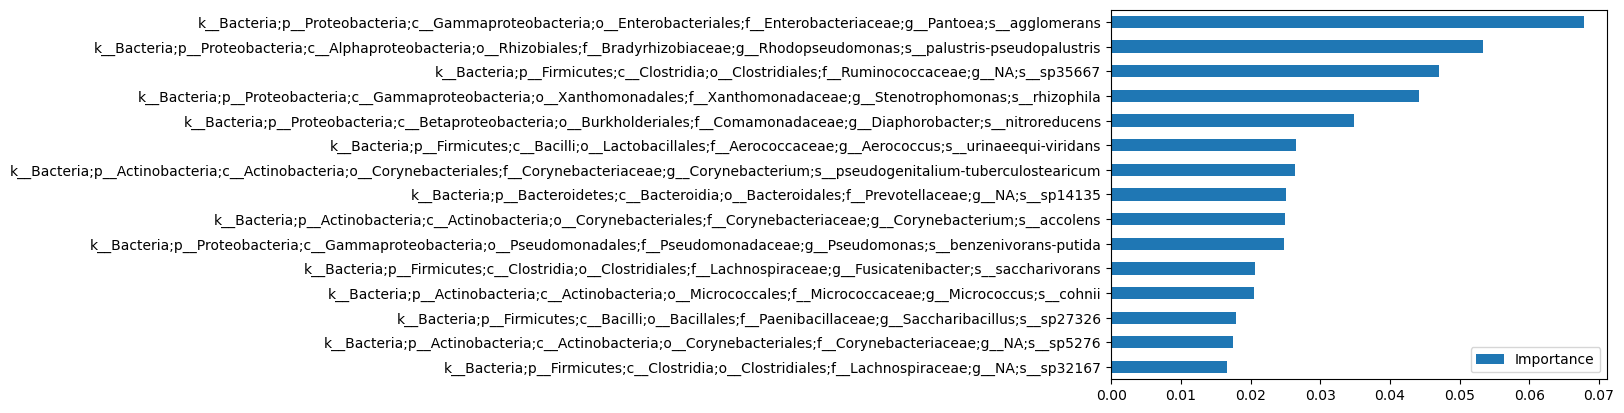

In [22]:
plot_fic = fic[:15]
plot_fic.plot(kind='barh').invert_yaxis()

In [ ]:
for estimator in xgb_scores['estimator']:
    explainerxgb = shap.Explainer(estimator, X)
    shap_valuesxgb = explainerxgb.shap_values(X)

In [24]:
np.shape(shap_valuesxgb)

(4, 61, 1338)

In [25]:
shap_valuesxgb_mean = np.mean(shap_valuesxgb, axis=1)

In [26]:
np.shape(shap_valuesxgb_mean)

(4, 1338)

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


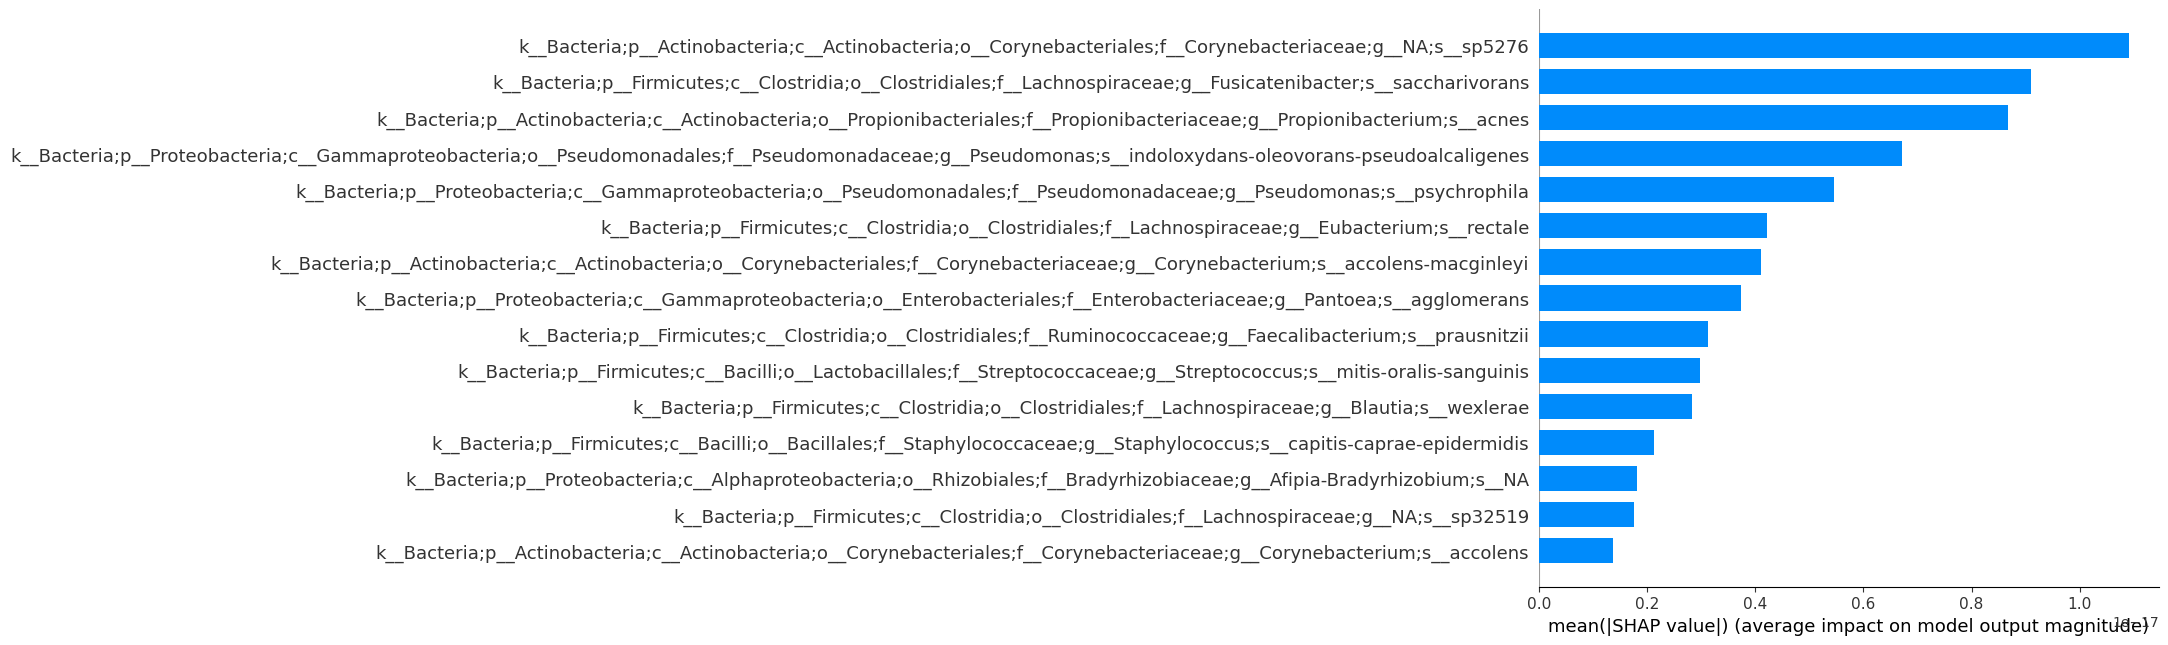

In [27]:
shap.summary_plot(shap_valuesxgb_mean, X, plot_type='bar', max_display=15)

### LightGBM

In [ ]:
clflgbm = LGBMClassifier(random_state=42)
loolgbm = LeaveOneOut()
lgbm_scores = cross_validate(clflgbm, X, y, cv=loolgbm, scoring='accuracy', return_estimator=True)

In [ ]:
lgbm_scores

In [ ]:
feature_importances_complete_lgb = []

for idx, estimator in enumerate(lgbm_scores['estimator']):
    print(f'The most important features for estimator {idx}:')
    feature_importances_lgb = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    print(feature_importances_lgb)
    feature_importances_complete_lgb.append(feature_importances_lgb)

feature_importances_complete_lgb = pd.concat(feature_importances_complete_lgb)

In [31]:
feature_importances_complete_lgb

,Importance
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__psychrophila,55
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Faecalibacterium;s__prausnitzii,46
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__capitis-caprae-epidermidis,41
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Bradyrhizobiaceae;g__Afipia-Bradyrhizobium;s__NA,36
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Propionibacteriales;f__Propionibacteriaceae;g__Propionibacterium;s__acnes,35
...,...
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__Orthotrichum rogeri;f__Orthotrichum rogeri;g__Orthotrichum;s__rogeri,0
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__NA;f__NA;g__NA;s__sp22851,0
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__NA;f__NA;g__NA;s__melongena,0
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__NA;f__NA;g__NA;s__NA,0


In [32]:
fic_lgb = feature_importances_complete_lgb.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [33]:
fic_lgb[:15]

,Importance
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__psychrophila,54.868852
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__capitis-caprae-epidermidis,43.295082
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Faecalibacterium;s__prausnitzii,37.311475
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Bradyrhizobiaceae;g__Afipia-Bradyrhizobium;s__NA,36.098361
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Propionibacteriales;f__Propionibacteriaceae;g__Propionibacterium;s__acnes,35.163934
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__indoloxydans-oleovorans-pseudoalcaligenes,28.360656
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Eubacterium;s__rectale,26.557377
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__mitis-oralis-sanguinis,24.295082
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__accolens-macginleyi,22.426230
None;Other;Other;Other;Other;Other;Other,22.196721


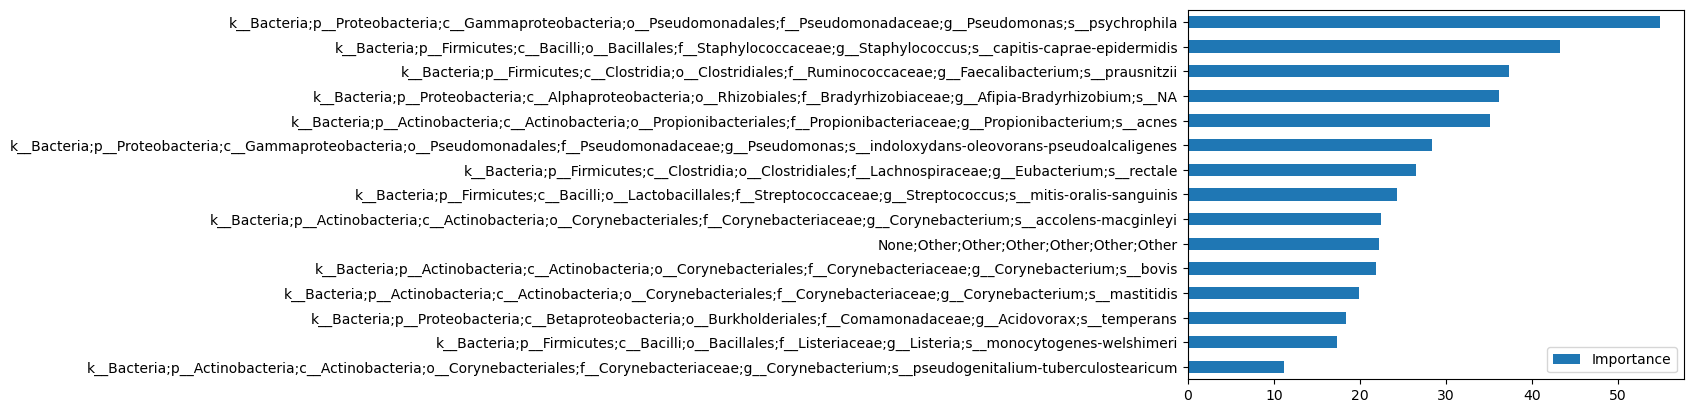

In [34]:
plot_fic_lgb = fic_lgb[:15]
plot_fic_lgb.plot(kind='barh').invert_yaxis()

In [35]:
for estimator in lgbm_scores['estimator']:
    explainerlgb = shap.Explainer(estimator, X)
    shap_valueslgb = explainerlgb.shap_values(X)    
    

In [36]:
np.shape(shap_valueslgb)

(4, 61, 1338)

In [37]:
shap_valueslgb_mean = np.mean(shap_valueslgb, axis=1)

In [38]:
np.shape(shap_valueslgb_mean)

(4, 1338)

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


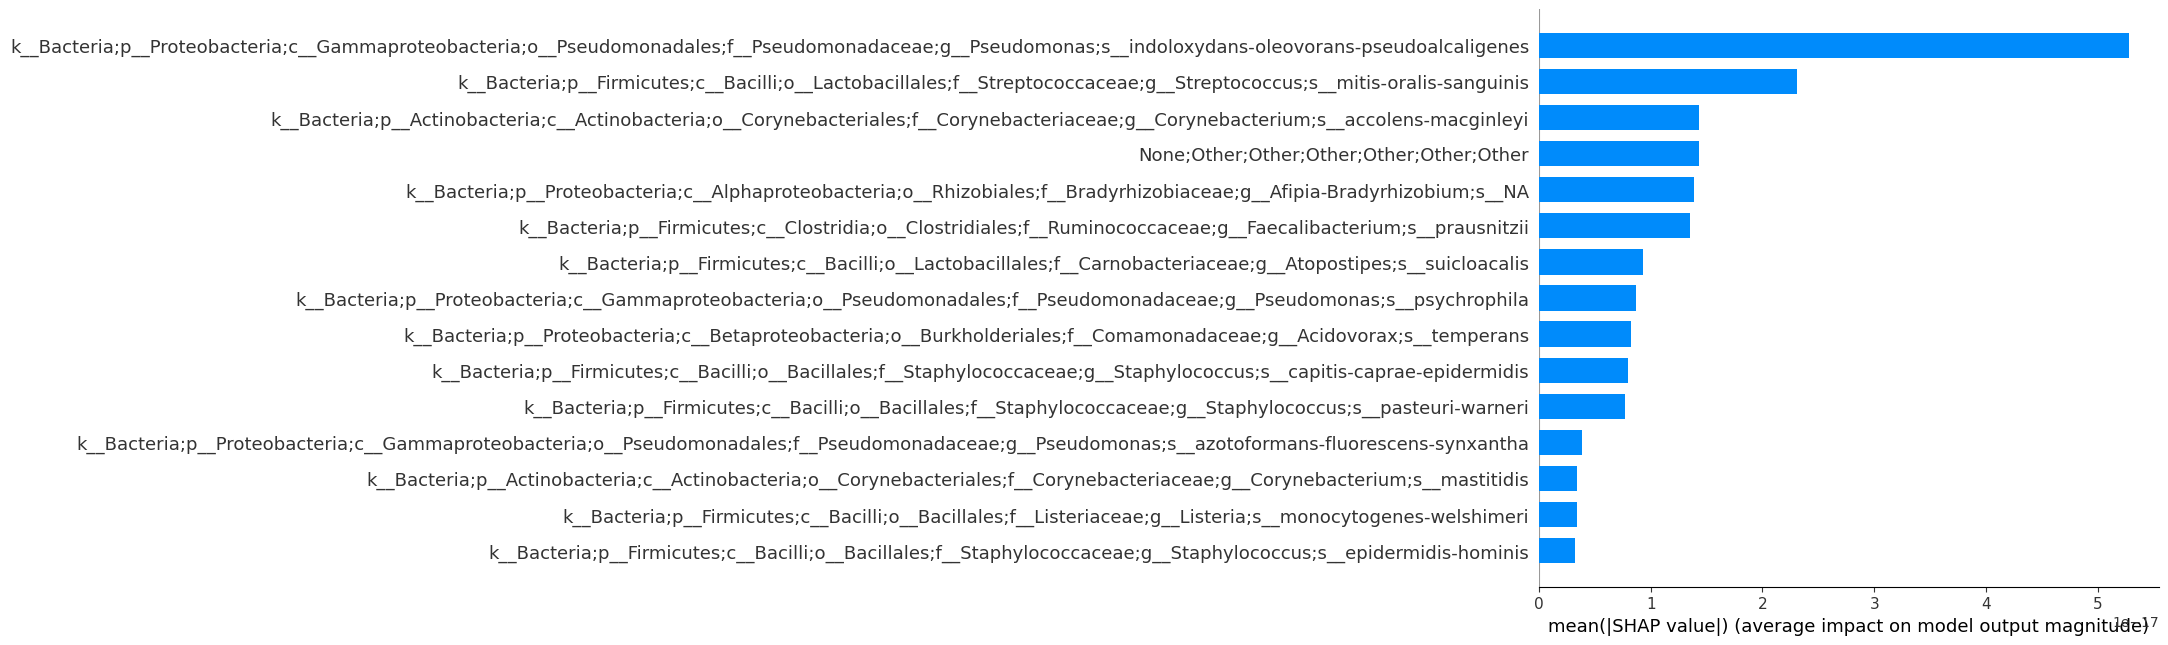

In [39]:
shap.summary_plot(shap_valueslgb_mean, X, plot_type='bar', max_display=15)

### Multilayer perceptron 

In [40]:
from sklearn.neural_network import MLPClassifier
clfmlp = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=30000, verbose=False)
clfmlp.out_activation_="softmax"

loomlp = LeaveOneOut()
mlp_scores = cross_validate(clfmlp, X, y, cv=loomlp, scoring='accuracy', return_estimator=True)

In [ ]:
mlp_scores

In [ ]:
# Every estimator in mlp_scores need to be fitted and permutation importance run on each estimator.
MLP_feature_importances_complete = []

for idx, estimator in enumerate(mlp_scores['estimator']):
    mlpimportance = estimator.fit(X, y)
    result = permutation_importance(mlpimportance,X, y,n_repeats=20, random_state = 42)
    MLPfeatures = pd.DataFrame(mlpimportance.feature_names_in_,columns=['Features'])
    MLPfeatures['Importance'] = result.importances_mean.tolist()
    #Sort by importance
    MLPfeatures = MLPfeatures.sort_values(by = 'Importance',ascending=False)
    print(f'The most important features for estimator {idx}:')
    print(MLPfeatures)
    MLP_feature_importances_complete.append(MLPfeatures)

MLP_feature_importances_complete = pd.concat(MLP_feature_importances_complete)

In [43]:
MLPfeatures.shape

(1338, 2)

In [44]:
MLP_feature_importances_complete.shape

(81618, 2)

In [45]:
fic_mlp = MLP_feature_importances_complete.groupby('Features').mean().sort_values('Importance', ascending=False)

In [46]:
fic_mlp.shape

(1338, 1)

In [47]:
fic_mlp[:15]

,Importance
Features,
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__pasteuri-warneri,0.026230
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__mastitidis,0.018033
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__bovis,0.010656
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__kroppenstedtii,0.008197
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__accolens-macginleyi,0.007377
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__pseudogenitalium-tuberculostearicum,0.006557
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__capitis-caprae-epidermidis,0.004098
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__accolens,0.004098
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Moraxella;s__catarrhalis-nonliquefaciens,0.003279


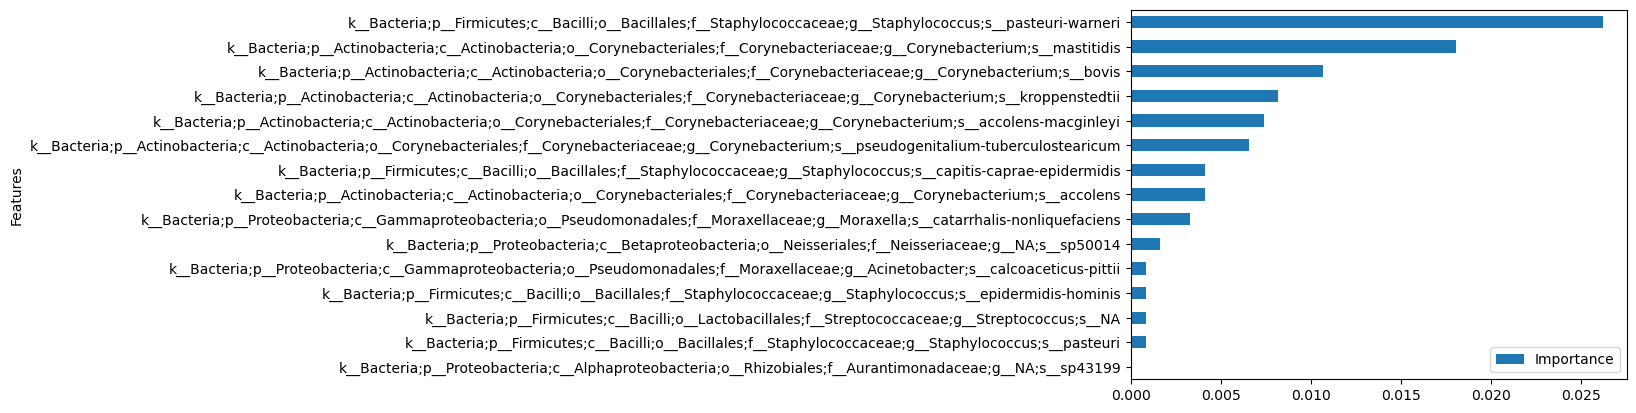

In [48]:
plot_fic_mlp = fic_mlp[:15]
plot_fic_mlp.plot(kind='barh').invert_yaxis()

In [ ]:
for estimator in mlp_scores['estimator']:
    explainermlp = shap.Explainer(mlpimportance.predict, X)
    shap_valuesmlp = explainermlp.shap_values(X)

In [50]:
np.shape(shap_valuesmlp)

(61, 1338)

In [51]:
shap_valuesmlp

array([[ 0.        ,  0.00117096,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.00117096,  0.        , ...,  0.00117096,
         0.        ,  0.        ],
       [ 0.        , -0.0117096 ,  0.        , ..., -0.00117096,
         0.        ,  0.        ],
       ...,
       [-0.00117096, -0.00819672,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00117096,  0.        ,  0.        , ...,  0.00117096,
         0.        ,  0.        ],
       [ 0.0117096 ,  0.00117096,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [52]:
shap_valuesmlp_mean = np.mean(shap_valuesmlp, axis=0, keepdims=True)

In [53]:
np.shape(shap_valuesmlp_mean)

(1, 1338)

In [54]:
shap_valueslgb_mean

array([[-1.36502831e-18,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.98133257e-19,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.19016985e-18,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.73209814e-17,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


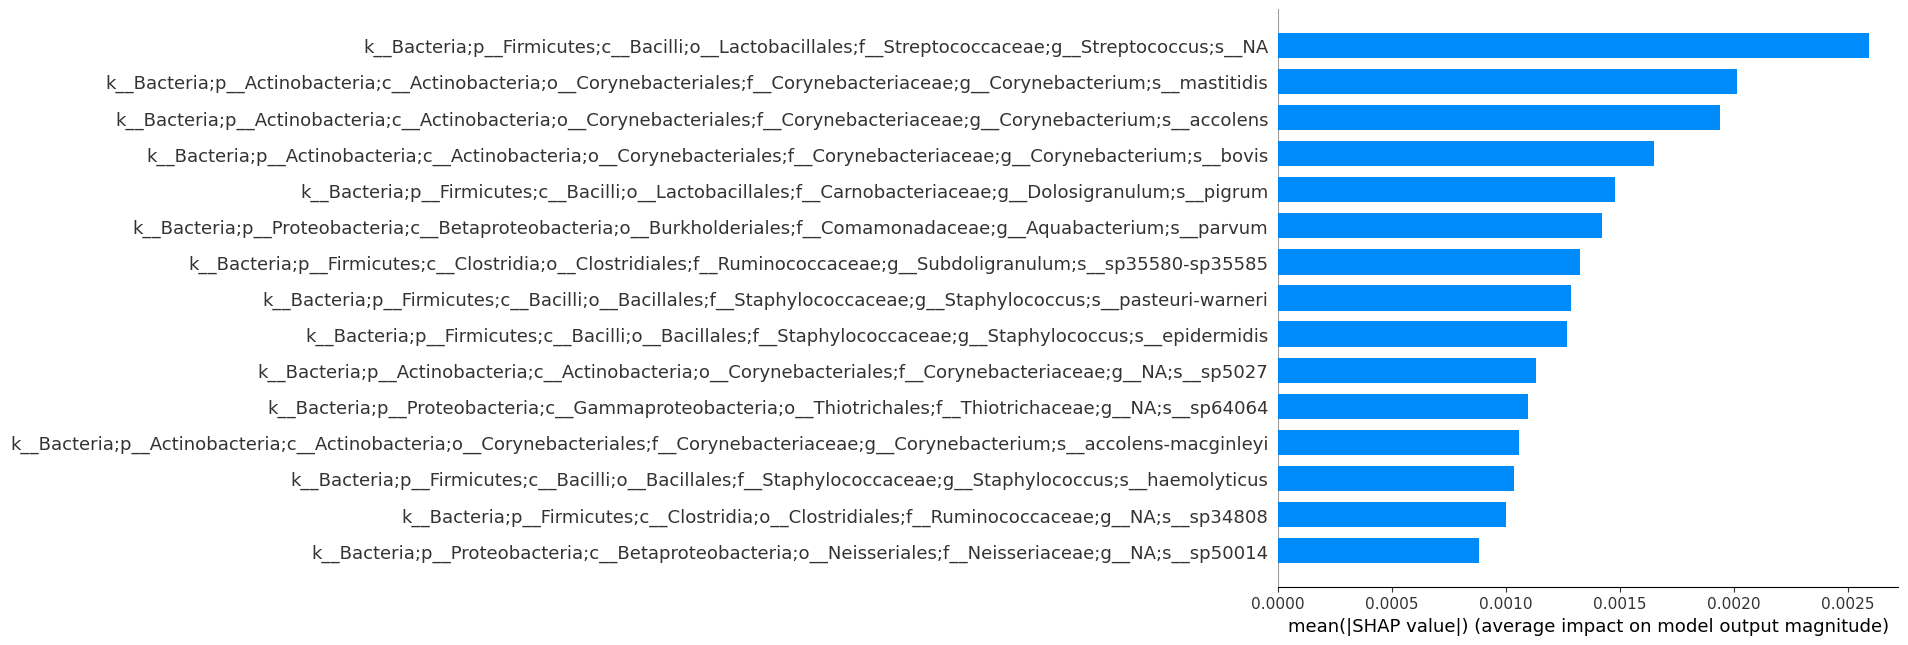

In [55]:
shap.summary_plot(shap_valuesmlp_mean, X, plot_type='bar', max_display=15)